In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from SoftMargin import SoftMarginSVM
from sklearn.svm import LinearSVC

In [58]:
data=pd.read_csv("nonlinear_data.csv")
data

,Feature 1,Feature 2,Label
0,3.764052,2.400157,0.0
1,2.978738,4.240893,0.0
2,3.867558,1.022722,0.0
3,2.950088,1.848643,0.0
4,1.896781,2.410599,0.0
...,...,...,...
495,0.441033,0.178793,1.0
496,-0.799422,0.240788,1.0
497,0.289121,0.412871,1.0
498,-0.198399,0.094192,1.0


In [59]:
X=data.drop(["Label"] , axis=1)
y=data["Label"]
y=np.where(y==0 , -1 , y)

In [60]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [61]:
model=SoftMarginSVM(C=0.001)
model.fit(X_std , y)

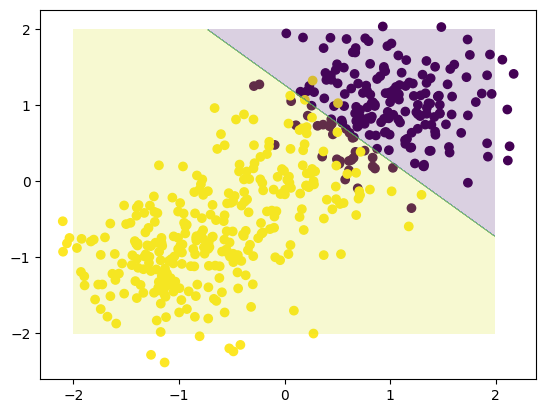

In [62]:
plt.scatter(X_std[: , 0] , X_std[: , 1] , c=y)
xx1 , xx2 =np.meshgrid(
    np.arange(-2 , 2, 0.01),
    np.arange(-2 , 2 , 0.01)
)
meshgrid_points=np.array([xx1.ravel() , xx2.ravel()]).T
z=model.predict(meshgrid_points)
z=z.reshape(xx1.shape)
plt.contourf(xx1, xx2 ,z , alpha=.2)